# Module 4 homework

## ML-zoomcamp 2022

Lisa Novello, October 4th 2022

Homework page: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/04-evaluation/homework.md

Data retrieved from: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

In [1]:
data = 'AER_credit_card_data.csv'

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv(data)
df # target column is "card"

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [4]:
df.card = (df.card == 'yes').astype(int)
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [60]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
len(df_train_full), len(df_test)

(1055, 264)

In [9]:
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 1)
len(df_train), len(df_val)

(791, 264)

In [14]:
# let's create the y_* vectors
y_train = df_train.card.values
y_val   = df_val.card.values
y_test  = df_test.card.values

# let's create dfs without the target variable "card"
del df_train['card']
del df_val['card']
del df_test['card']

df_train

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1105,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
431,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
407,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
1217,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
1133,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4
...,...,...,...,...,...,...,...,...,...,...,...
416,0,53.00000,2.4500,0.017718,35.67500,yes,no,0,3,1,11
1162,2,30.58333,2.5000,0.000480,0.00000,no,no,0,12,1,18
128,0,24.75000,1.8750,0.080708,126.02250,no,no,1,14,0,1
413,1,56.91667,3.4838,0.062895,182.09580,yes,no,0,540,1,7


In [23]:
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [24]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
categorical

['owner', 'selfemp']

In [40]:
#def make_df_fit(df_train, y_train):
scores = []

for i in numerical:

    df_train_dict = pd.DataFrame(df_train[i]).to_dict(orient='records')
    dv            = DictVectorizer(sparse=False)
    X_train       = dv.fit_transform(df_train_dict)
    X_train.shape

    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred     = model.predict_proba(X_train)[:,1]
    curr_score = roc_auc_score(y_train, y_pred)
    
    scores.append((i, round(curr_score, 3)))
    
scores

[('reports', 0.717),
 ('age', 0.524),
 ('income', 0.591),
 ('share', 0.989),
 ('expenditure', 0.991),
 ('dependents', 0.533),
 ('months', 0.529),
 ('majorcards', 0.534),
 ('active', 0.604)]

In [41]:
sel_cols = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [43]:
df_train = pd.DataFrame(df_train[sel_cols])
df_val = pd.DataFrame(df_val[sel_cols])
df_test = pd.DataFrame(df_test[sel_cols])

In [44]:
# let's apply one-hot encoding
df_train_dict = df_train.to_dict(orient='records')
df_val_dict   = df_val.to_dict(orient='records')
dv            = DictVectorizer(sparse=False)
X_train       = dv.fit_transform(df_train_dict)
X_val         = dv.fit_transform(df_val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]

auc = roc_auc_score(y_val, y_pred)
auc

0.995171242063847

In [48]:
new_scores = []

thresholds = np.linspace(0, 1, 101)

act_pos = (y_val == 1)
act_neg = (y_val == 0)

for t in thresholds:
    
    pred_pos   = (y_pred >= t).astype(int)
    pred_neg   = (y_pred < t).astype(int)
    tp         = (pred_pos & act_pos).sum()
    fp         = (pred_pos & act_neg).sum()
    tn         = (pred_neg & act_neg).sum()
    fn         = (pred_neg & act_pos).sum()
    precision  = tp / (tp + fp)
    recall     = tp / (tp + fn)
    
    new_scores.append((t, precision, recall))
    
df_pr = pd.DataFrame(new_scores, columns = ['threshold', 'precision', 'recall'])
df_pr

,threshold,precision,recall
0,0.00,0.799242,1.000000
1,0.01,0.861224,1.000000
2,0.02,0.871901,1.000000
3,0.03,0.897872,1.000000
4,0.04,0.905579,1.000000
...,...,...,...
96,0.96,1.000000,0.966825
97,0.97,1.000000,0.962085
98,0.98,1.000000,0.962085
99,0.99,1.000000,0.957346


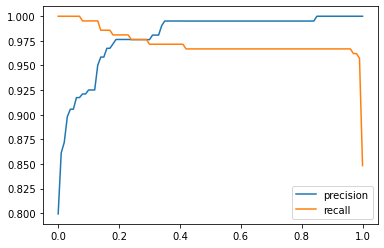

In [50]:
plt.plot(df_pr.threshold, df_pr.precision, label = 'precision')
plt.plot(df_pr.threshold, df_pr.recall, label = 'recall')
plt.legend()

In [51]:
df_pr[df_pr.precision == df_pr.recall]

,threshold,precision,recall
24,0.24,0.976303,0.976303
25,0.25,0.976303,0.976303
26,0.26,0.976303,0.976303
27,0.27,0.976303,0.976303
28,0.28,0.976303,0.976303
29,0.29,0.976303,0.976303


In [54]:
df_pr['f1_score'] = 2 * ((df_pr.precision * df_pr.recall)/(df_pr.precision + df_pr.recall))
df_pr

,threshold,precision,recall,f1_score
0,0.00,0.799242,1.000000,0.888421
1,0.01,0.861224,1.000000,0.925439
2,0.02,0.871901,1.000000,0.931567
3,0.03,0.897872,1.000000,0.946188
4,0.04,0.905579,1.000000,0.950450
...,...,...,...,...
96,0.96,1.000000,0.966825,0.983133
97,0.97,1.000000,0.962085,0.980676
98,0.98,1.000000,0.962085,0.980676
99,0.99,1.000000,0.957346,0.978208


In [55]:
df_pr[df_pr.f1_score == df_pr.f1_score.max()]

,threshold,precision,recall,f1_score
35,0.35,0.995146,0.971564,0.983213
36,0.36,0.995146,0.971564,0.983213
37,0.37,0.995146,0.971564,0.983213
38,0.38,0.995146,0.971564,0.983213
39,0.39,0.995146,0.971564,0.983213
40,0.40,0.995146,0.971564,0.983213
41,0.41,0.995146,0.971564,0.983213


In [58]:
sel_cols = ["card", "reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
df_train_full = df_train_full[sel_cols]

In [59]:
kfold              = KFold(n_splits = 5, shuffle = True, random_state = 1)
train_idx, val_idx = next(kfold.split(df_train_full))
df_train           = df_train_full.iloc[train_idx]
df_val             = df_train_full.iloc[val_idx]

In [66]:
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    del df_train['card']
    del df_val['card']
    
    df_train_dict = df_train.to_dict(orient='records')
    df_val_dict   = df_val.to_dict(orient='records')
    dv            = DictVectorizer(sparse=False)
    X_train       = dv.fit_transform(df_train_dict)
    X_val         = dv.fit_transform(df_val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:,1]
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [67]:
scores

[0.9941860465116279,
 0.9941176470588236,
 0.9943346508563901,
 0.9996107939802803,
 1.0]

In [69]:
np.std(scores)

0.0027434713804377724

In [75]:
reg_values = [0.01, 0.1, 1, 10]

for i in reg_values:
    
    kfold              = KFold(n_splits = 5, shuffle = True, random_state = 1)
    train_idx, val_idx = next(kfold.split(df_train_full))
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        
        df_train           = df_train_full.iloc[train_idx]
        df_val             = df_train_full.iloc[val_idx]

        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        del df_train['card']
        del df_val['card']

        df_train_dict = df_train.to_dict(orient='records')
        df_val_dict   = df_val.to_dict(orient='records')
        dv            = DictVectorizer(sparse=False)
        X_train       = dv.fit_transform(df_train_dict)
        X_val         = dv.fit_transform(df_val_dict)
        
        model = LogisticRegression(solver='liblinear', C=i, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:,1]
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%.2f mean is: %.3f std is: %.3f' % (i, np.array(scores).mean(), np.array(scores).std()))
        

C=0.01 mean is: 0.992 std is: 0.006
C=0.10 mean is: 0.995 std is: 0.004
C=1.00 mean is: 0.996 std is: 0.003
C=10.00 mean is: 0.996 std is: 0.003
